# PLBenchmark Example Notebook

In [1]:
from PLBenchmarks import targets
from IPython.core.display import HTML

# Get the whole set of targets in the dataset

In [2]:
# it is initialized from the `PLBenchmarks/data/targets.yml` file
tgtset = targets.targetSet()
# to see which targets are available, one can get a list of names
tgtset.getNames()

['jnk1',
 'pde2',
 'thrombin',
 'p38',
 'ptp1b',
 'galectin',
 'cdk2',
 'cmet',
 'mcl1']

The `targetSet` is a `dict`, but can be converted to a `pandas.DataFrame` or a `html` string via `targetSet.getDF(columns=None)` or `targetSet.getHTML(columns=None)`. The default `None` for `columns` means that all columns are printed. One can also define a subset of columns as a `list`: 

In [3]:
HTML(tgtset.getHTML(columns=['name', 'fullname', 'pdb', 'references', 'numLigands', 'minDG', 'maxDG', 'associated_sets']))

,name,fullname,pdb,references,numLigands,minDG,maxDG,associated_sets
0,jnk1,c-Jun N-terminal kinase 1,2GMX,"[{'measurement': None}, {'calculation': ['10.1021/ja512751q', 'acs.jcim.9b00105']}]",21,-10.78111762414039 kcal/mol,-7.353005882502171 kcal/mol,[Schrodinger JACS]
1,pde2,phosphodiesterase 2,"4D08,4D09,6EZF","[{'measurement': ['10.1021/ml500262u', '10.1021/ja404449g']}, {'calculation': ['10.1038/s41598-018-23039-5']}]",21,-12.01124485346444 kcal/mol,-8.812821938199054 kcal/mol,None
2,thrombin,thrombin,2ZFF,"[{'measurement': None}, {'calculation': ['10.1021/ja512751q', '10.1021/acs.jcim.9b00105']}]",11,-9.177820267686423 kcal/mol,-7.480879541108987 kcal/mol,[Schrodinger JACS]
3,p38,p38 alpha MAP kinase,"1OUY, 3FLY","[{'measurement': '10.1021/jm101423y'}, {'calculation': '10.1021/ja512751q, 10.1021/acs.jcim.9b00105'}]",34,-12.354423277849138 kcal/mol,-8.546808630776018 kcal/mol,[Schrodinger JACS]
4,ptp1b,protein-tyrosine phosphatase 1B,2QBS,"[{'measurement': None}, {'calculation': '10.1021/ja512751q, 10.1021/acs.jcim.9b00105'}]",23,-12.584340587592953 kcal/mol,-7.409826188396777 kcal/mol,[Schrodinger JACS]
5,galectin,galectin-3C,"5E89,5E8A,5E88","[{'measurement': '10.1002/cbic.201600285'}, {'calculation': '10.1007/s10822-018-0110-5'}]",8,0.0 kcal/mol,0.0 kcal/mol,None
6,cdk2,cyclin-dependent kinase 2,"1H1Q, 2WEV","[{'measurement': '10.1021/ci5004027'}, {'calculation': '10.1021/ja512751q, 10.1021/acs.jcim.9b00105'}]",16,-11.349056331748212 kcal/mol,-7.09348579743778 kcal/mol,[Schrodinger JACS]
7,cmet,tyrosine-protein kinase Met; hepatocyte growth factor receptor (HGFR),4R1Y,"[{'measurement': '10.1016/j.bmcl.2015.02.002'}, {'calculation': None}]",12,0.0 kcal/mol,0.0 kcal/mol,"[Merck KGaA FEP Benchmarks, YANK Benchmarks]"
8,mcl1,Induced myeloid leukemia cell differentiation protein Mcl-1,4HW3,"[{'measurement': None}, {'calculation': '10.1021/ja512751q, 10.1021/acs.jcim.9b00105'}]",42,0.0 kcal/mol,0.0 kcal/mol,[Schrodinger JACS]


A `target` can be accessed with its name in two ways

In [4]:
jnk1 = tgtset['jnk1']
pde2 = tgtset.getTarget('pde2')

# The `target` class
contains all the available information about one target of PLBenchmarks. It also has two member variables, `_ligandSet` and `_edgeSet`, which contain the information about the available ligand and edges of the respective target. 
A `target` can either be accessed from the `targetSet` (see cell before) or initialized using its name via

In [5]:
jnk1 = targets.target('jnk1')
# The data in the column is stored in a pandas.Series and can be accessed via
jnk1.getDF(columns=None)

id                                                                 1
name                                                            jnk1
fullname                                   c-Jun N-terminal kinase 1
netcharge                                                         xx
pdb                                                             2GMX
ligands            [lig_17124-1, lig_18624-1, lig_18625-1, lig_18...
references         [{'measurement': None}, {'calculation': ['10.1...
comments                                                        None
associated_sets                                   [Schrodinger JACS]
dtype: object

Access to the `edgeSet` and `ligandSet` in different formats is achieved by


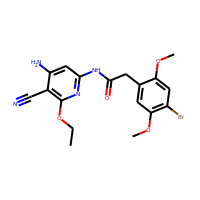
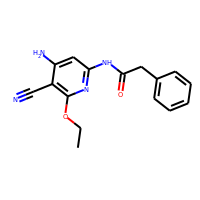
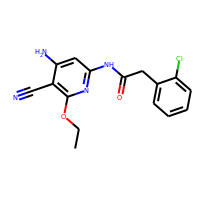
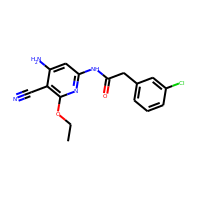
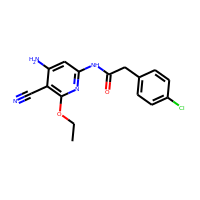
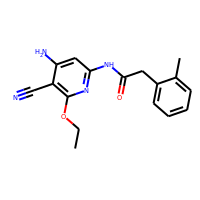
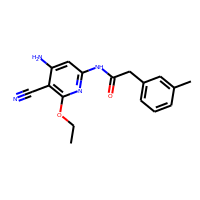
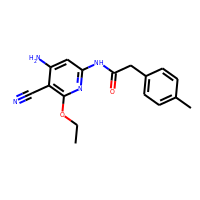
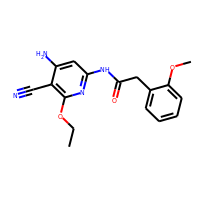
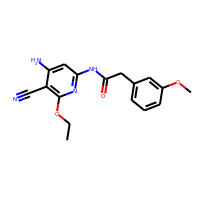
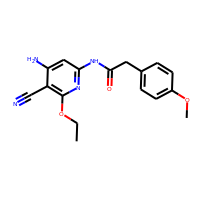
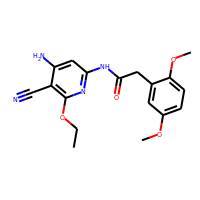
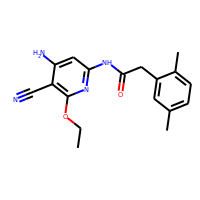
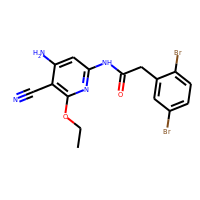
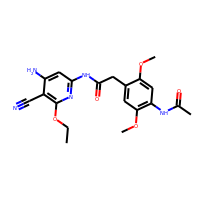
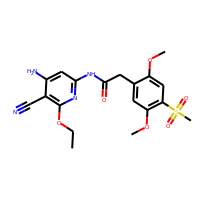
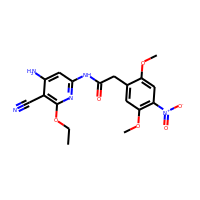
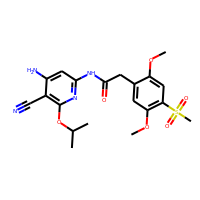
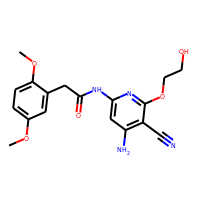
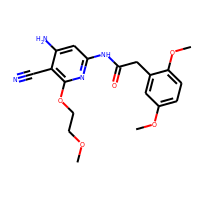
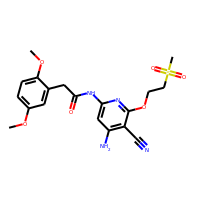

In [6]:
jnk1_ligands = jnk1.getLigandSet()
jnk1_ligands_df = jnk1.getLigandSetDF()
HTML(jnk1.getLigandSetHTML(columns = ['name', 'ROMol', 'measurement', 'DerivedMeasurement']))

,0,1,Mol1,Mol2,exp. DeltaG [kcal/mol]
0,17124-1,18634-1,,,-0.32
1,18626-1,18624-1,,,0.38
2,18636-1,18625-1,,,-0.60
3,18632-1,18624-1,,,0.60
4,18635-1,18625-1,,,-0.83
5,18626-1,18658-1,,,-0.83
6,18639-1,18658-1,,,0.04
7,18626-1,18625-1,,,0.77
8,18638-1,18658-1,,,0.40
9,18628-1,18624-1,,,0.21

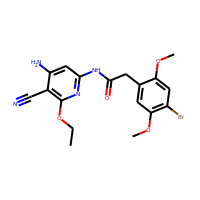
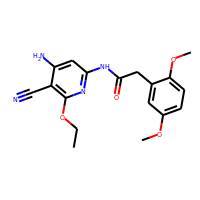
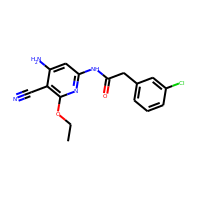
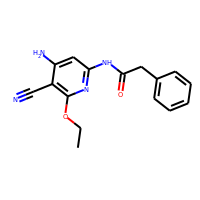
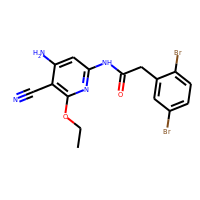
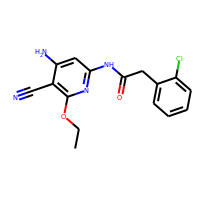
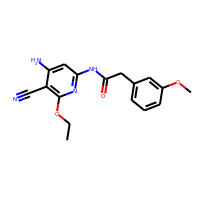
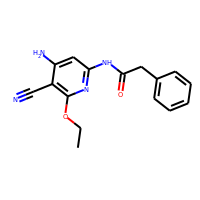
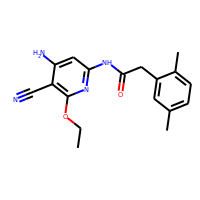
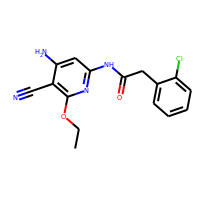
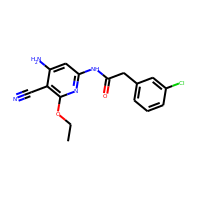
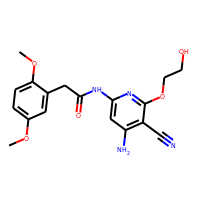
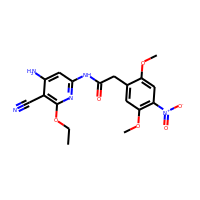
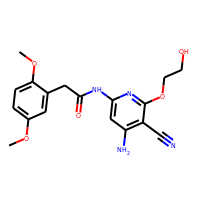
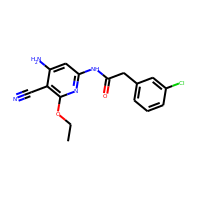
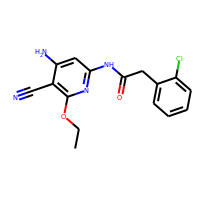
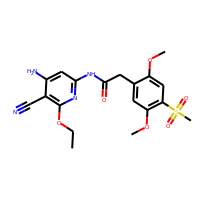
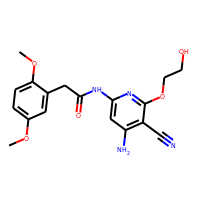
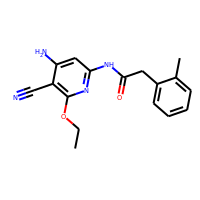
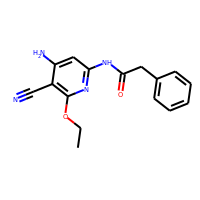
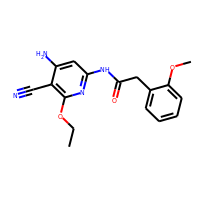
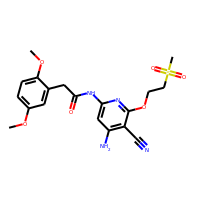
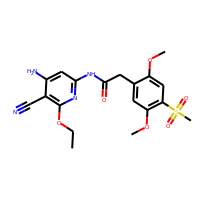
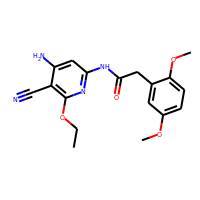
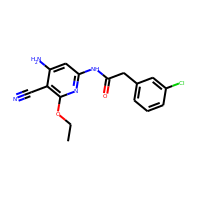
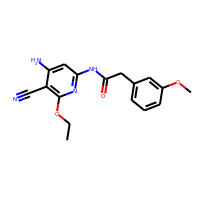
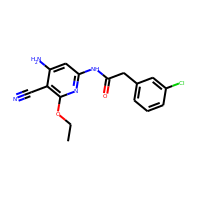
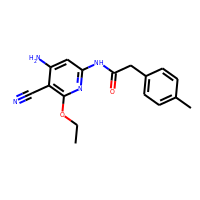
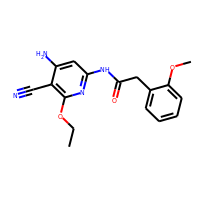
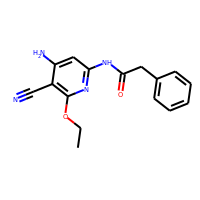
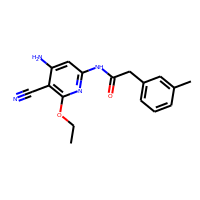
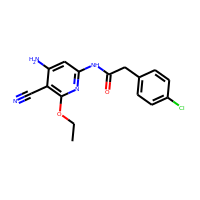
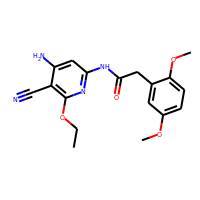
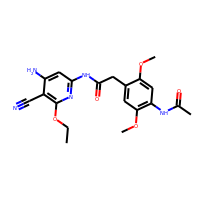
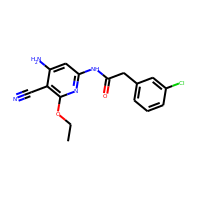
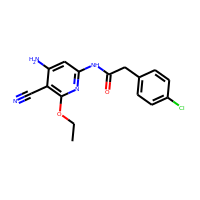
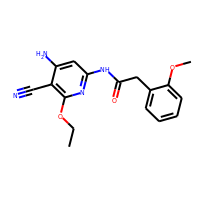
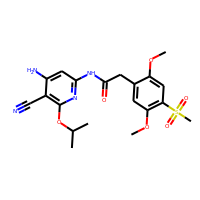
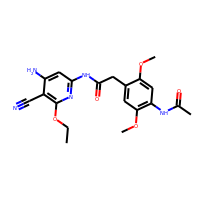
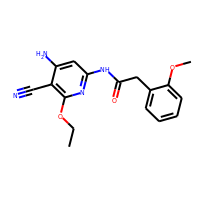
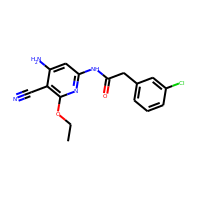
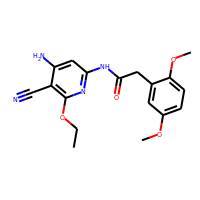
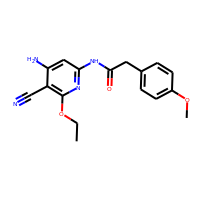
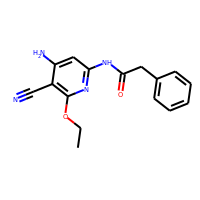
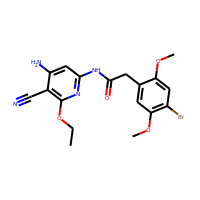
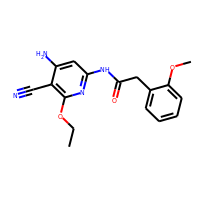
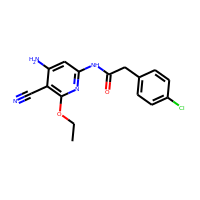
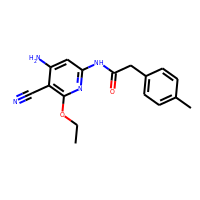
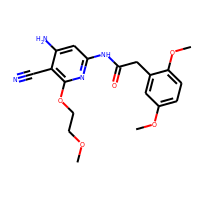
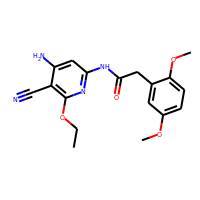
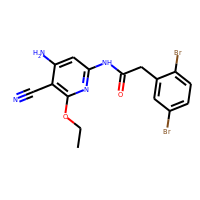
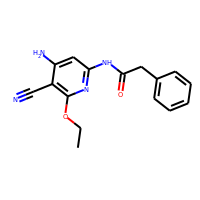
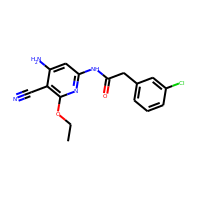
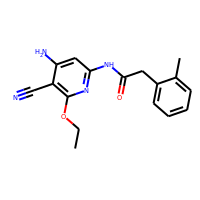
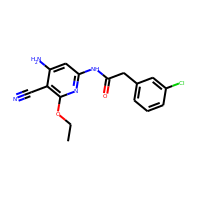
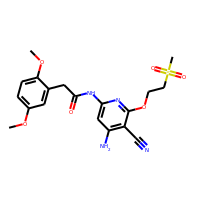
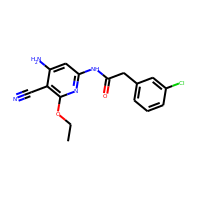
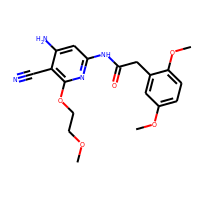
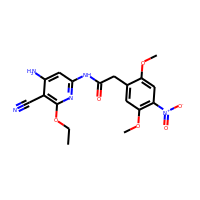
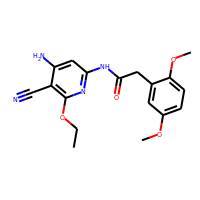
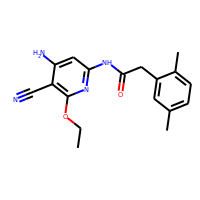
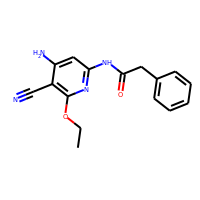

In [7]:
jnk1_edges = jnk1.getEdgeSet()
jnk1_edges_df = jnk1.getEdgeSetDF()
HTML(jnk1.getEdgeSetHTML())

Finally, the set out of ligands and edges can be visualized in a graph:

/opt/anaconda3/envs/off-demo/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


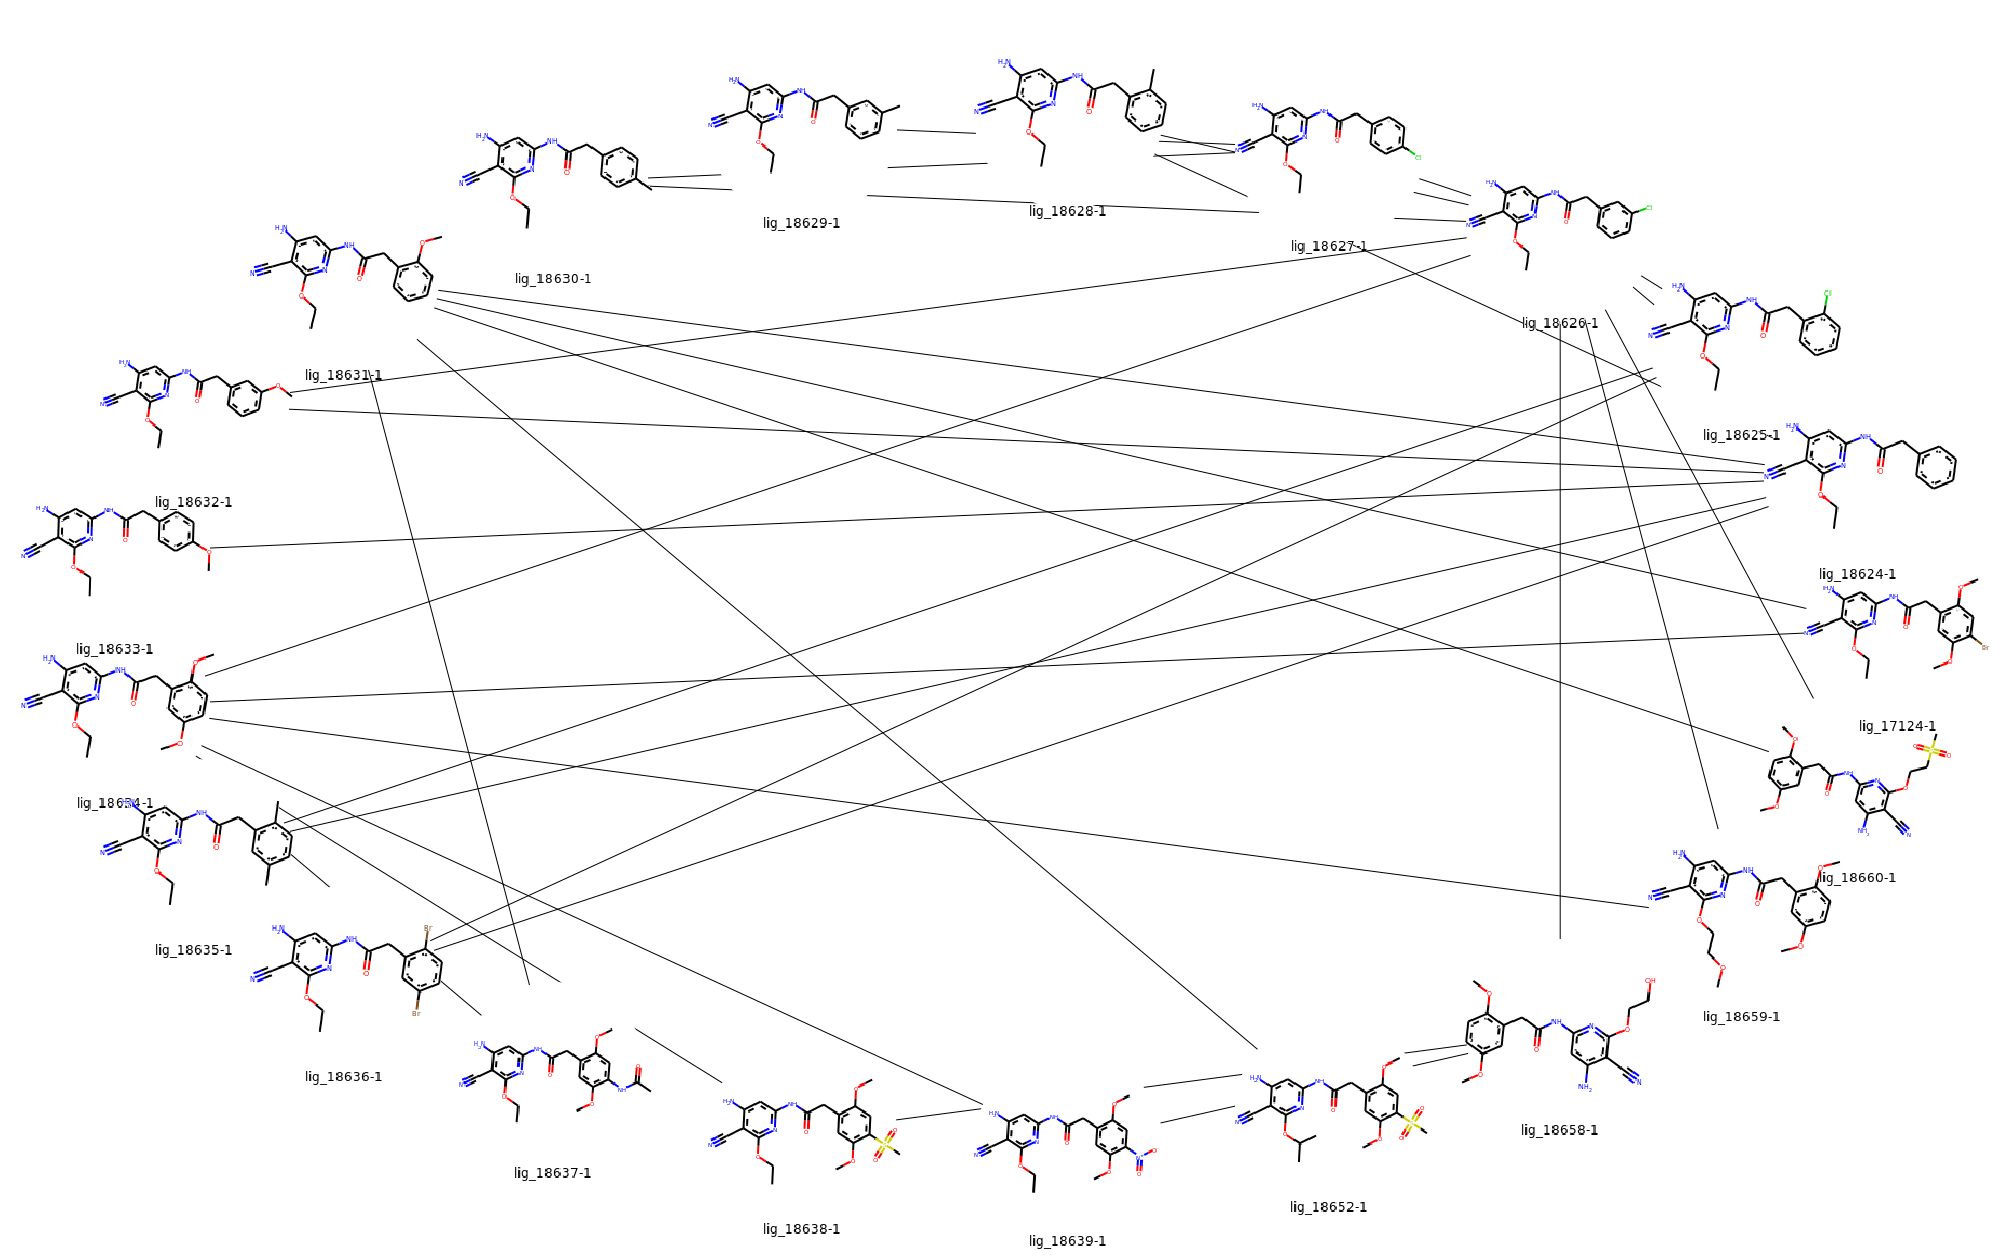

In [8]:
graph = jnk1.getGraph()

# The `ligandSet` and `ligand` class
The `ligandSet` consists of a `dict` of `ligand`s which are availabe for one target. It is accessible via `target.getLigandSet()`, but can also be initialized directly.

In [9]:
from PLBenchmarks import ligands


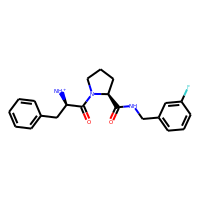
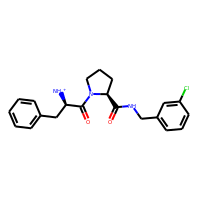
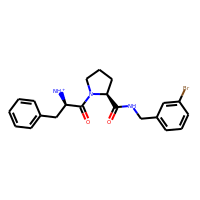
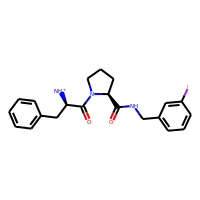
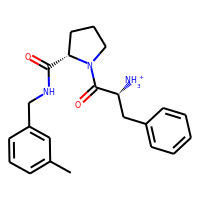
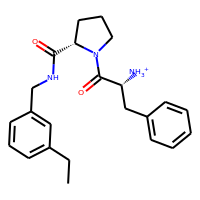
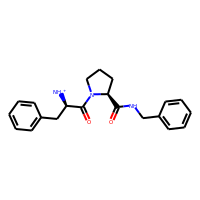
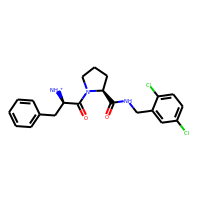
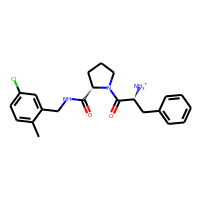
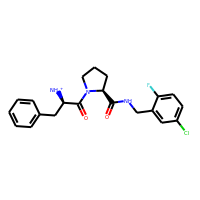
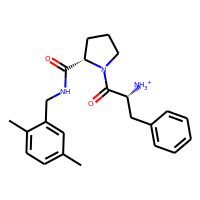

In [10]:
thrombin_ligands = ligands.ligandSet('thrombin')
HTML(thrombin_ligands.getHTML())

The `ligand` classes can be accessed from the `ligandSet` by their name. Each `ligand` has information about experimental data, references, SMILES string and SDF file path of the docked structure. Additionally, there are functions to derive and process the primary data, which is then added to the `pandas.Series` as a new entry.

In [11]:
lig_6e = thrombin_ligands['lig_6e']
lig_1a = thrombin_ligands.getLigand('lig_6e')

# The `edgeSet` and `edge` class
The `edgeSet` contains a `dict` of `edge`s which are availabe for one target. It is accessible via `target.getEdgeSet()`, but can also be initialized directly.

In [12]:
from PLBenchmarks import edges

,0,1,Mol1,Mol2,exp. DeltaG [kcal/mol]
0,49220392,49137530,,,0.10
1,49932714,49137530,,,-1.30
2,49582468,49137530,,,-0.84
3,49396360,49137530,,,-0.85
4,50181001,49137530,,,-1.66
5,49585367,49137530,,,-1.56
6,49220392,49175828,,,-0.74
7,49220548,49220392,,,-0.03
8,49220548,49932129,,,1.56
9,49582468,49932129,,,0.66

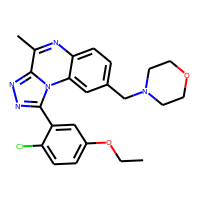
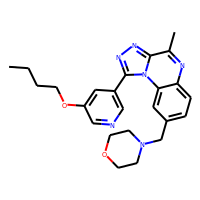
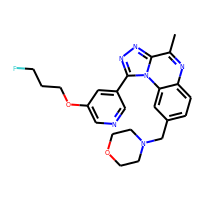
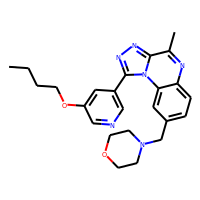
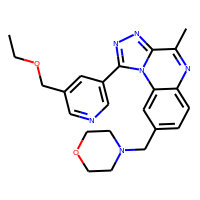
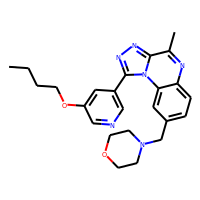
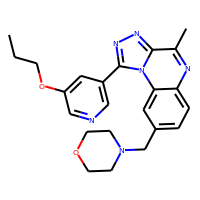
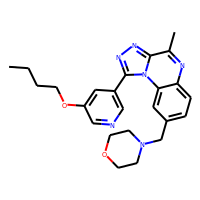
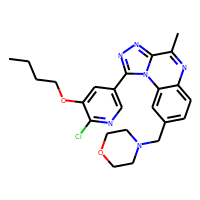
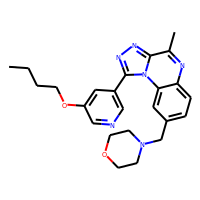
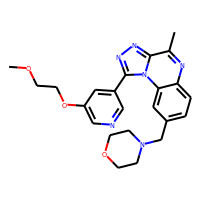
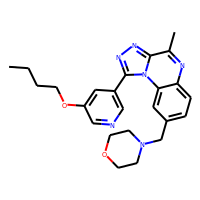
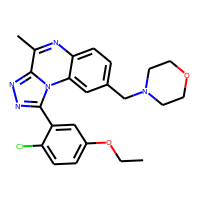
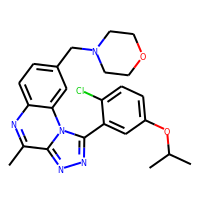
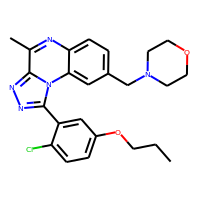
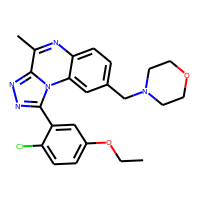
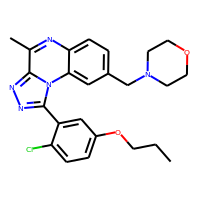
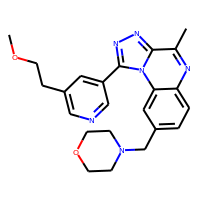
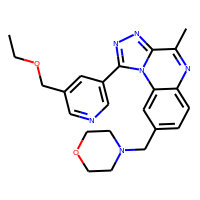
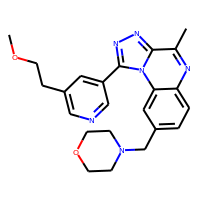
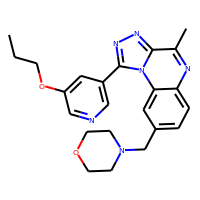
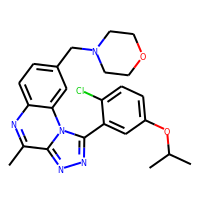
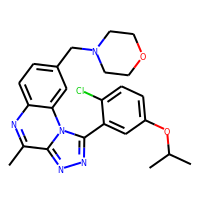
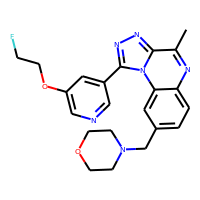
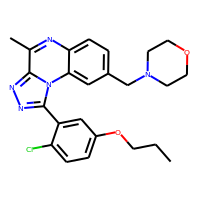
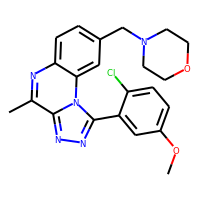
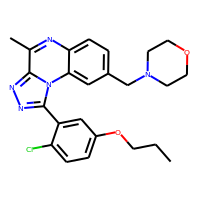
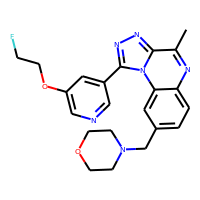
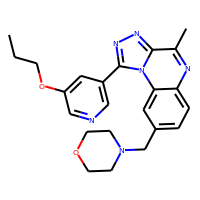
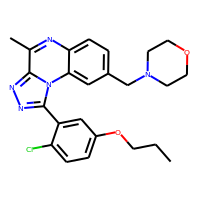
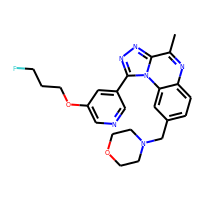
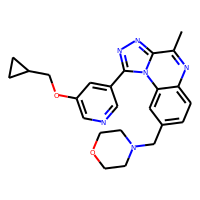
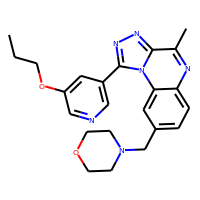
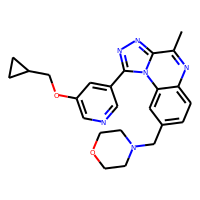
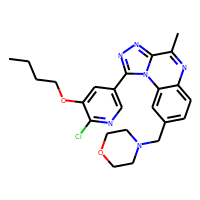
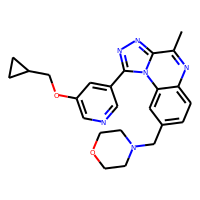
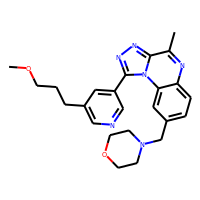
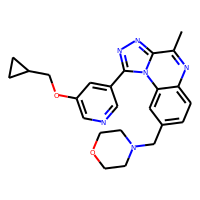
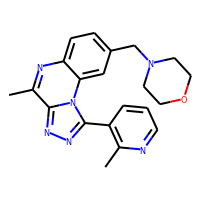
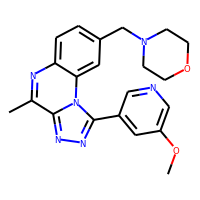
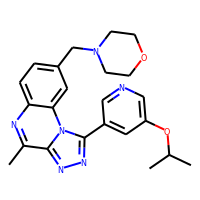
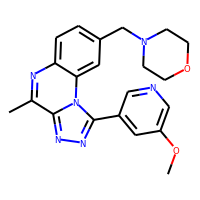
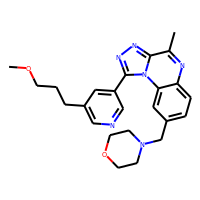
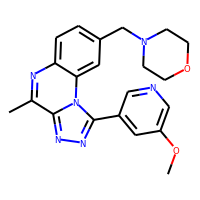
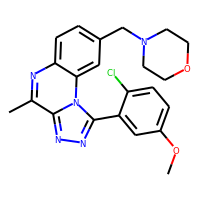
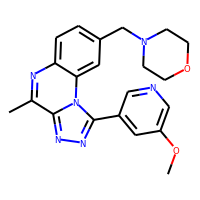
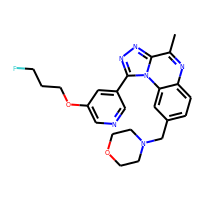
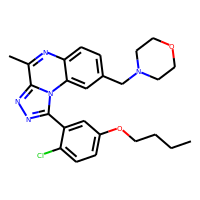
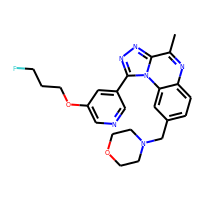
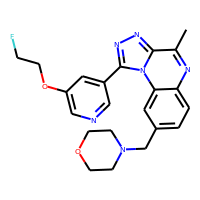
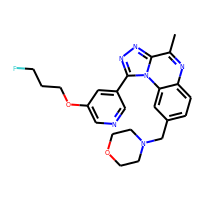
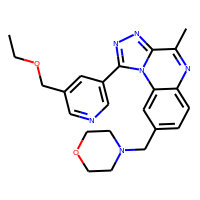
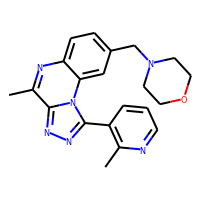
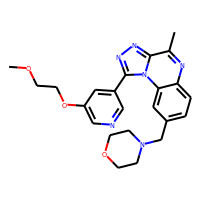
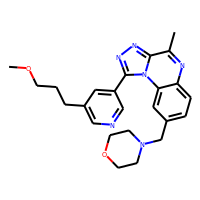
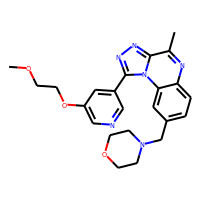
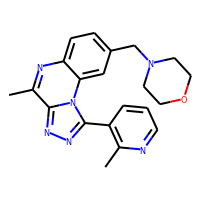
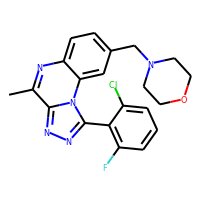
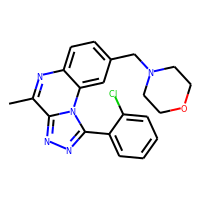
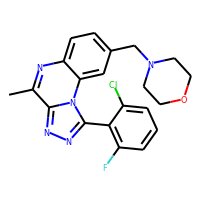
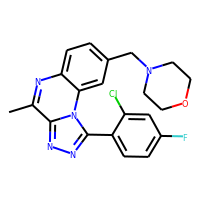
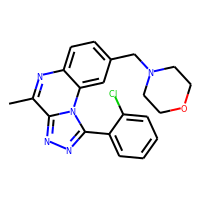
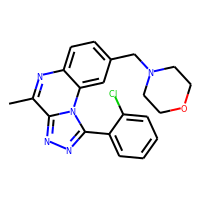
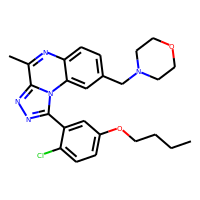
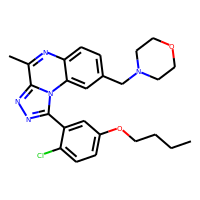
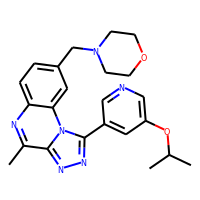
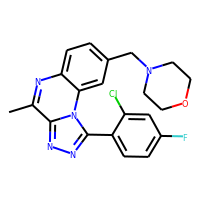
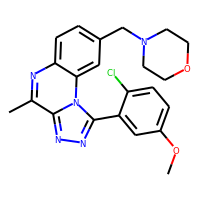

In [13]:
pde2_edges = edges.edgeSet('pde2')
HTML(pde2_edges.getHTML())

In [14]:
pde2_edges.keys()

dict_keys(['edge_49220392_49137530', 'edge_49932714_49137530', 'edge_49582468_49137530', 'edge_49396360_49137530', 'edge_50181001_49137530', 'edge_49585367_49137530', 'edge_49220392_49175828', 'edge_49220548_49220392', 'edge_49220548_49932129', 'edge_49582468_49932129', 'edge_49396360_49175828', 'edge_49175828_49580115', 'edge_49220548_49137374', 'edge_49220548_49580115', 'edge_49396360_49220548', 'edge_49932714_49582390', 'edge_49396360_49582390', 'edge_50181001_49582390', 'edge_50107616_49582390', 'edge_48168913_48271249', 'edge_49072088_48271249', 'edge_50107616_48271249', 'edge_49137374_48271249', 'edge_49932714_49175789', 'edge_49932714_49580115', 'edge_49932714_49582468', 'edge_48168913_49585367', 'edge_50107616_49585367', 'edge_48168913_48022468', 'edge_43249674_48022468', 'edge_48009208_43249674', 'edge_43249674_49175789', 'edge_49175789_49072088', 'edge_48009208_49137374'])

The `edge` classes can be accessed from the `edgeSet` by their name. They are lightweight and provide only access to a `pandas.DataFrame` and a `dict`:

In [15]:
edge_49220392_49137530 = pde2_edges.getEdge('edge_49220392_49137530')
df = edge_49220392_49137530.getDF()
edge_49220392_49137530.getDict()

{'edge_49220392_49137530': ['lig_49220392', 'lig_49137530']}